In [1]:
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
import multi_loc.covariance as covariance

In [7]:
%matplotlib inline

In [99]:
importlib.reload(covariance)

<module 'multi_loc.covariance' from '/Users/harty/Documents/multi_loc/multi_loc/covariance.py'>

In [143]:
dimension = 40
rho0 = 30
rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)

In [144]:
eig_val, eig_vec, P = covariance.generate_circulant(
    rho, rho0, covariance.correlation_exp,
    return_Corr = True)
P = P.real

Log10(condition):  3.5563829204591233


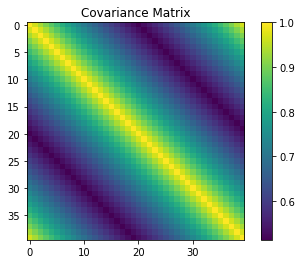

In [145]:
plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Covariance Matrix')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P)))

Text(0.5,1,'Error in Reconstructed P')

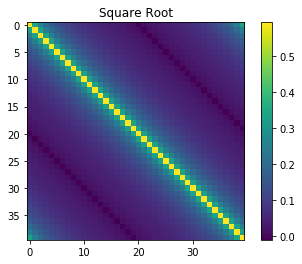

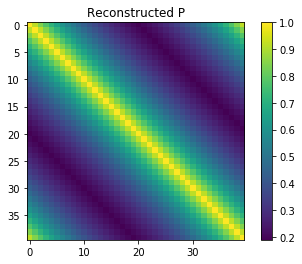

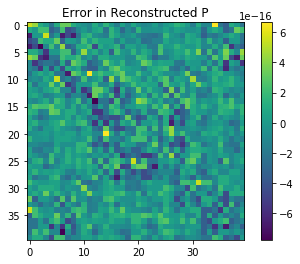

In [141]:
P_sqrt = covariance.matrix_sqrt(eig_val=eig_val,
                                eig_vec=eig_vec)
P_sqrt = P_sqrt.real

plt.figure()
im = plt.imshow(P_sqrt)
plt.colorbar(im)
plt.title('Square Root')

plt.figure()
im = plt.imshow(P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Reconstructed P')

plt.figure()
im = plt.imshow(P - P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed P')

Text(0.5,1,'Error in Reconstructed inverse')

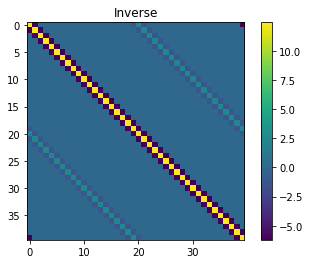

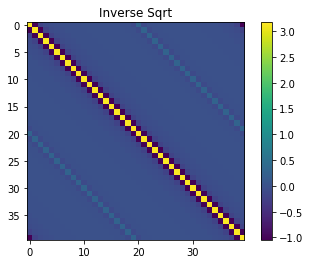

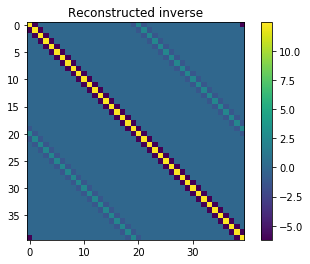

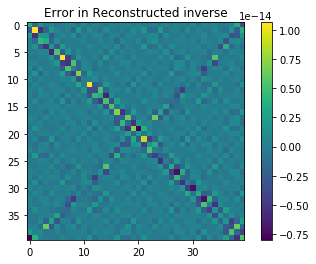

In [142]:
P_inv = covariance.matrix_inv(eig_val=eig_val,
                              eig_vec=eig_vec)
P_inv = P_inv.real

P_inv_sqrt = covariance.matrix_sqrt_inv(
    eig_val=eig_val,
    eig_vec=eig_vec)

P_inv_sqrt = P_inv_sqrt.real

plt.figure()
im = plt.imshow(P_inv)
plt.colorbar(im)
plt.title('Inverse')

plt.figure()
im = plt.imshow(P_inv_sqrt.real)
plt.colorbar(im)
plt.title('Inverse Sqrt')

plt.figure()
im = plt.imshow(P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Reconstructed inverse')

plt.figure()
im = plt.imshow(P_inv - P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed inverse')

# Older stuff

In [5]:
dimension = 40
rho0 = 6
rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
P_cov = covariance.make_correlation_matrix(
    rho, rho0, covariance.correlation_sqd_exp)

6
6


<IPython.core.display.Javascript object>


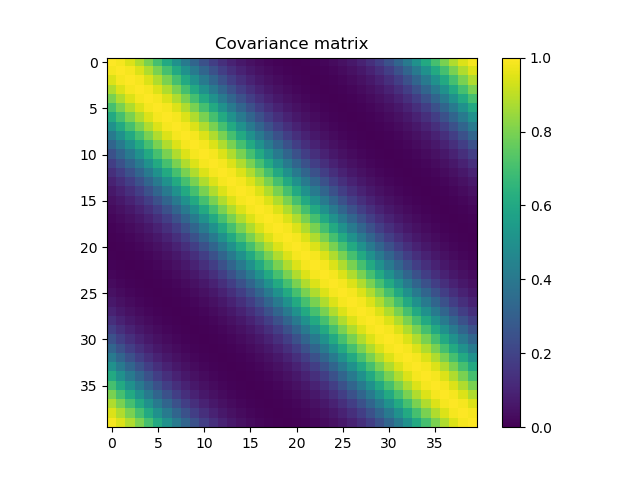

4.154060299050958


In [6]:
plt.figure()
image = plt.imshow(P_cov, vmin=0, vmax=1)
plt.colorbar(image)
plt.title('Covariance matrix')
print(np.log10(np.linalg.cond(P_cov)))

Text(0.5,1,'First row of P_cov')

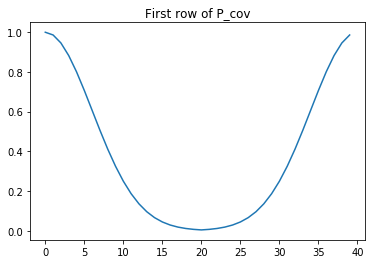

In [8]:
plt.figure()
plt.plot(P_cov[0,:])
plt.title('First row of P_cov')

In [73]:
eig_val = np.fft.fft(P_cov[0, :])
eig_vec = np.fft.fft(np.eye(dimension))/np.sqrt(dimension)
#eig_vec = sp.linalg.dft(dimension)/np.sqrt(dimension)

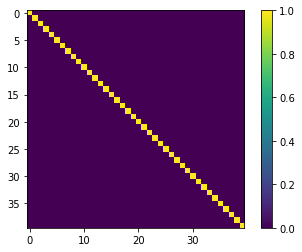

In [76]:
plt.figure()
im = plt.imshow((eig_vec.conj().T @ eig_vec).real)
plt.colorbar(im)

In [19]:
P_hat = eig_vec @ np.diag(eig_val.real) @ eig_vec.conj().T

Text(0.5,1,'Error')

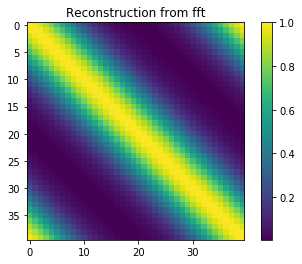

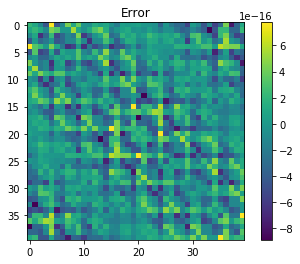

In [20]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [21]:
P_sqrt = (eig_vec
          @ np.diag(np.sqrt(eig_val))
          @ eig_vec.conj().T)

Text(0.5,1,'Error with complex')

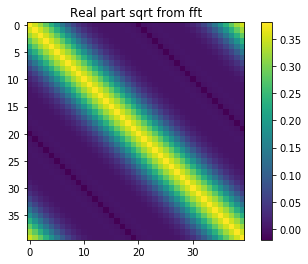

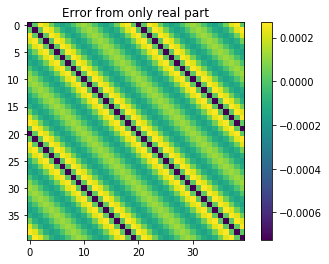

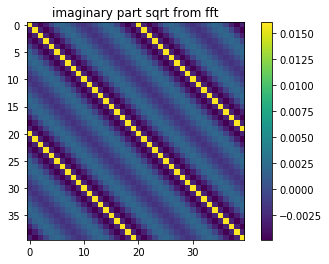

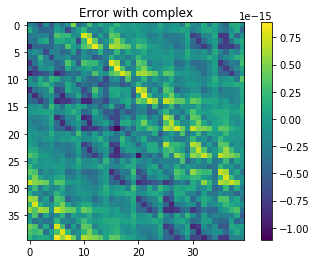

In [22]:
plt.figure()
im = plt.imshow(P_sqrt.real)
plt.colorbar(im)
plt.title('Real part sqrt from fft')

plt.figure()
im = plt.imshow(P_cov - (P_sqrt.real @ P_sqrt.real))
plt.colorbar(im)
plt.title('Error from only real part')

plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('imaginary part sqrt from fft')

plt.figure()
im = plt.imshow(P_cov - (P_sqrt @ P_sqrt).real)
plt.colorbar(im)
plt.title('Error with complex')

In [27]:
P_reconst = P_sqrt @ P_sqrt

In [36]:
P_new = P_reconst.real - P_reconst.imag

In [37]:
eig_val = np.fft.fft(P_new[0, :])

In [38]:
P_hat = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T

Text(0.5,1,'Error')

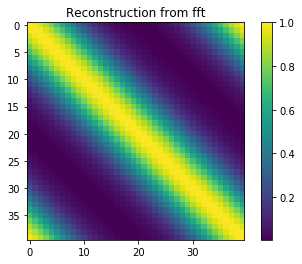

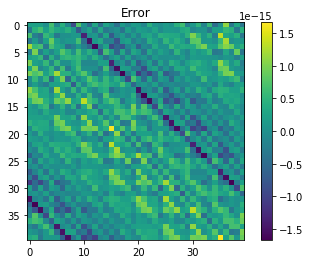

In [39]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [40]:
P_sqrt = (eig_vec
          @ np.diag(np.sqrt(eig_val))
          @ eig_vec.conj().T)

Text(0.5,1,'Error')

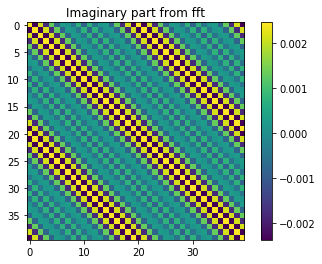

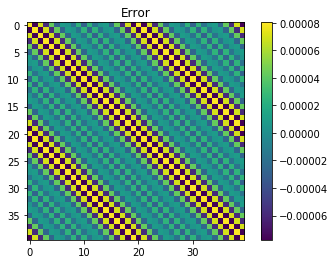

In [41]:
plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('Imaginary part from fft')

plt.figure()
im = plt.imshow((P_sqrt.real @ P_sqrt.real) - P_cov)
plt.colorbar(im)
plt.title('Error')

In [42]:
P_reconst = P_sqrt @ P_sqrt

In [43]:
P_new = P_reconst.real - P_reconst.imag

In [44]:
eig_val = np.fft.fft(P_new[0, :])

In [45]:
P_hat = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T

Text(0.5,1,'Error')

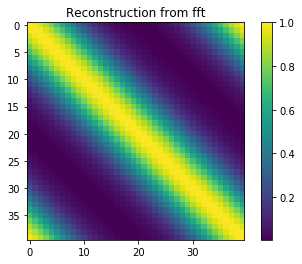

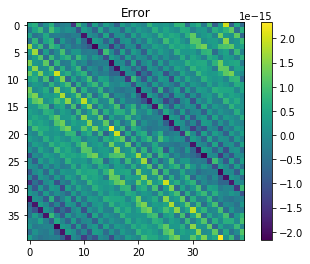

In [46]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [47]:
P_sqrt = (eig_vec
          @ np.diag(np.sqrt(eig_val))
          @ eig_vec.conj().T)

Text(0.5,1,'Error')

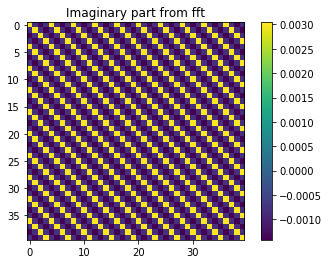

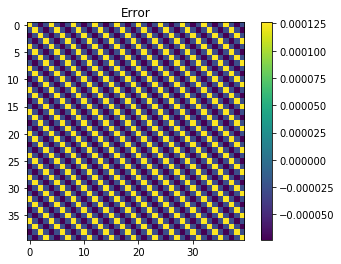

In [48]:
plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('Imaginary part from fft')

plt.figure()
im = plt.imshow((P_sqrt.real @ P_sqrt.real) - P_cov)
plt.colorbar(im)
plt.title('Error')

In [49]:
P_reconst = P_sqrt @ P_sqrt

In [50]:
P_new = P_reconst.real - P_reconst.imag

In [51]:
eig_val = np.fft.fft(P_new[0, :])

In [52]:
P_hat = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T

Text(0.5,1,'Error')

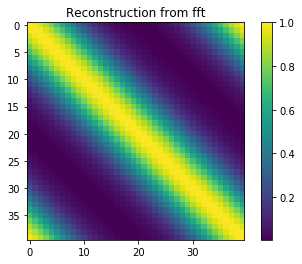

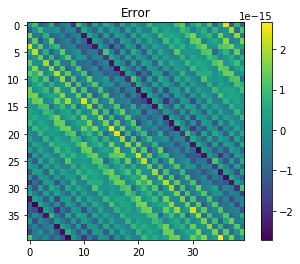

In [53]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [54]:
P_sqrt = (eig_vec
          @ np.diag(np.sqrt(eig_val))
          @ eig_vec.conj().T)

Text(0.5,1,'Error')

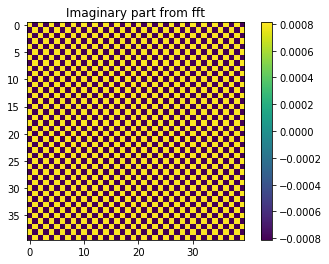

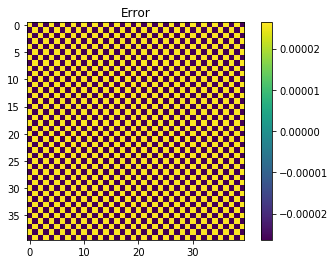

In [55]:
plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('Imaginary part from fft')

plt.figure()
im = plt.imshow((P_sqrt.real @ P_sqrt.real) - P_cov)
plt.colorbar(im)
plt.title('Error')